In [12]:
import os
os.chdir("C:/Users/Win11/Documents/Repos/Poker-Hit-PLTV/")

import pickle
import pandas as pd
from urllib.parse import urlencode
from sklearn.pipeline import Pipeline
from tqdm import tqdm, tqdm_notebook
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from datetime import datetime, timedelta


# Revision of predictions from ETL 

In [3]:

file_path = (os.getcwd()).replace('\\', '/') + r'/poker_party_ios\media_source_roi_20240120203110.xlsx'.replace('\\', '/')
bi_tool_actuals = pd.read_excel(file_path)

bi_tool_actuals = bi_tool_actuals[bi_tool_actuals['date'] != '--']
bi_tool_actuals['date'] = pd.to_datetime(bi_tool_actuals['date'])

bi_tool_actuals[['date', '7-day recovery (rate)', '14-day recycling (rate)', 'Recovery on the 28th (rate)']].sort_values(by = 'date').head(10)
bi_tool_actuals[['channel', 'date', '7-day recovery (rate)', '14-day recycling (rate)', 'Recovery on the 28th (rate)']].sort_values(by = 'date').head(10)


,channel,date,7-day recovery (rate),14-day recycling (rate),Recovery on the 28th (rate)
28,All,2023-12-10,"2,946.47 (9.26%)","4,601.49 (14.46%)","7,046.41 (22.15%)"
27,All,2023-12-11,"5,174.74 (15.38%)","8,419.71 (25.03%)","10,423.03 (30.98%)"
26,All,2023-12-12,"6,402.14 (19.78%)","9,568.62 (29.56%)","15,523.31 (47.96%)"
25,All,2023-12-13,"4,575.29 (13.81%)","9,172.75 (27.69%)","15,522.98 (46.86%)"
24,All,2023-12-14,"5,275.26 (16.5%)","6,448.08 (20.16%)","8,705.85 (27.23%)"
23,All,2023-12-15,"6,110.66 (18.14%)","8,225.66 (24.41%)","9,708.20 (28.81%)"
22,All,2023-12-16,"4,211.57 (12.41%)","6,521.81 (19.21%)","12,447.06 (36.66%)"
21,All,2023-12-17,"2,544.56 (8.07%)","3,331.62 (10.56%)","4,690.21 (14.87%)"
20,All,2023-12-18,"3,294.19 (9.87%)","5,265.50 (15.78%)","6,706.55 (20.1%)"
19,All,2023-12-19,"3,231.95 (10.45%)","4,885.81 (15.79%)","8,448.60 (27.31%)"


In [4]:
# Convert percentage strings to floats
def convert_percentage_string_to_float(percentage_string):
    try:
        return float(percentage_string.split(' ')[1][1:-2]) / 100
    except (ValueError, IndexError):
        return float(percentage_string.split('（')[1][0:-2]) / 100

for col in ['7-day recovery (rate)', '14-day recycling (rate)', 'Recovery on the 28th (rate)', '35-day recovery (rate)']:
    bi_tool_actuals[col] = bi_tool_actuals[col].apply(convert_percentage_string_to_float)

bi_tool_actuals[['date', '7-day recovery (rate)', '14-day recycling (rate)', 'Recovery on the 28th (rate)', '35-day recovery (rate)']].sort_values(by = 'date').head(60)


,date,7-day recovery (rate),14-day recycling (rate),Recovery on the 28th (rate),35-day recovery (rate)
28,2023-12-10,0.0926,0.1446,0.2215,0.2609
27,2023-12-11,0.1538,0.2503,0.3098,0.3651
26,2023-12-12,0.1978,0.2956,0.4796,0.5460
25,2023-12-13,0.1381,0.2769,0.4686,0.7213
24,2023-12-14,0.1650,0.2016,0.2723,0.2997
23,2023-12-15,0.1814,0.2441,0.2881,0.3183
22,2023-12-16,0.1241,0.1921,0.3666,0.4555
21,2023-12-17,0.0807,0.1056,0.1487,0.1804
20,2023-12-18,0.0987,0.1578,0.2010,0.2181
19,2023-12-19,0.1045,0.1579,0.2731,0.2956


In [11]:
# Calculate percentage increase for each row
bi_tool_actuals['percentage_increase_7_28'] = ((bi_tool_actuals['Recovery on the 28th (rate)'] - bi_tool_actuals['7-day recovery (rate)']) / bi_tool_actuals['7-day recovery (rate)']) # This cannot be trusted (because we give the same weight to every install)
bi_tool_actuals['percentage_increase_14_28'] = ((bi_tool_actuals['Recovery on the 28th (rate)'] - bi_tool_actuals['14-day recycling (rate)']) / bi_tool_actuals['14-day recycling (rate)'])

# Calculate average percentage increase grouped by 'channel'
average_percentage_increase_by_channel = bi_tool_actuals[bi_tool_actuals['date'] > '2023-10-31'].groupby('channel')[['percentage_increase_7_28', 'percentage_increase_14_28']].mean().reset_index()
median_percentage_increase_by_channel = bi_tool_actuals[bi_tool_actuals['date'] > '2023-10-31'].groupby('channel')[['percentage_increase_7_28', 'percentage_increase_14_28']].median().reset_index()

total_installs = bi_tool_actuals[bi_tool_actuals['date'] > '2023-10-31'].groupby('channel')['Install'].mean().sum()
installs_per_channel = bi_tool_actuals[bi_tool_actuals['date'] > '2023-10-31'].groupby('channel')[['Install', 'percentage_increase_7_28', 'percentage_increase_14_28']].mean().reset_index() # This cannot be trusted (because we give the same weight to every install)
installs_per_channel['proportion'] = installs_per_channel['Install'] / total_installs

# Add a column determining the metric
average_percentage_increase_by_channel['metric'] = 'average'
median_percentage_increase_by_channel['metric'] = 'median'

# Concatenate the DataFrames
percentage_increase_by_channel = pd.concat([average_percentage_increase_by_channel, median_percentage_increase_by_channel], ignore_index=True)
print(installs_per_channel)
percentage_increase_by_channel


  channel     Install  percentage_increase_7_28  percentage_increase_14_28  \
0     All  1259.62069                  0.976631                   0.327712   

   proportion  
0         1.0  


,channel,percentage_increase_7_28,percentage_increase_14_28,metric
0,All,0.976631,0.327712,average
1,All,0.864991,0.273764,median


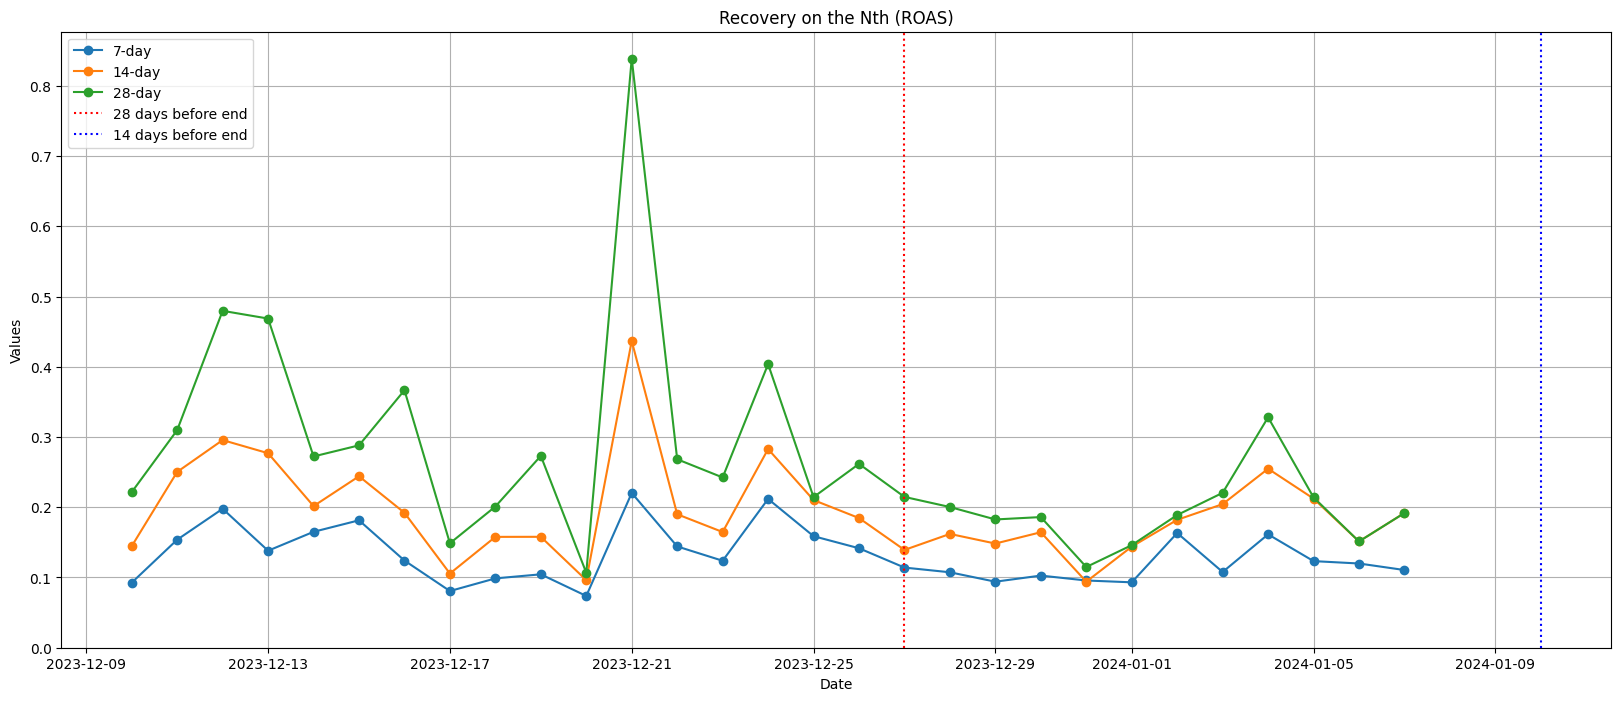

In [13]:

a =  bi_tool_actuals[bi_tool_actuals['date'] > '2023-10-31'][bi_tool_actuals['channel'] == 'All'].copy()
a['date'] = pd.to_datetime(a['date'], format='%Y%m%d')

plt.figure(figsize=(20, 8))  # Adjust width and height as needed

# Plotting both 'pred_56' and 'pred_100'
plt.plot(a['date'], a['7-day recovery (rate)'], marker='o', label='7-day')
plt.plot(a['date'], a['14-day recycling (rate)'], marker='o', label='14-day')
plt.plot(a['date'], a['Recovery on the 28th (rate)'], marker='o', label='28-day')

# Set y-axis limit to start from 0
plt.ylim(bottom=0)

# Add a vertical dotted line for the day that is 29 days from the current date
current_date = datetime.now().date()  # Get the current date
target_date = current_date - timedelta(days=29)
plt.axvline(target_date, color='red', linestyle='dotted', label='28 days before end')

# Add a vertical dotted line for the day that is 29 days from the current date
current_date = datetime.now().date()  # Get the current date
target_date = current_date - timedelta(days=15)
plt.axvline(target_date, color='blue', linestyle='dotted', label='14 days before end')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Recovery on the Nth (ROAS)')
plt.grid(True)
plt.legend()  # Add legend to differentiate between pred_56 and pred_100
plt.show()


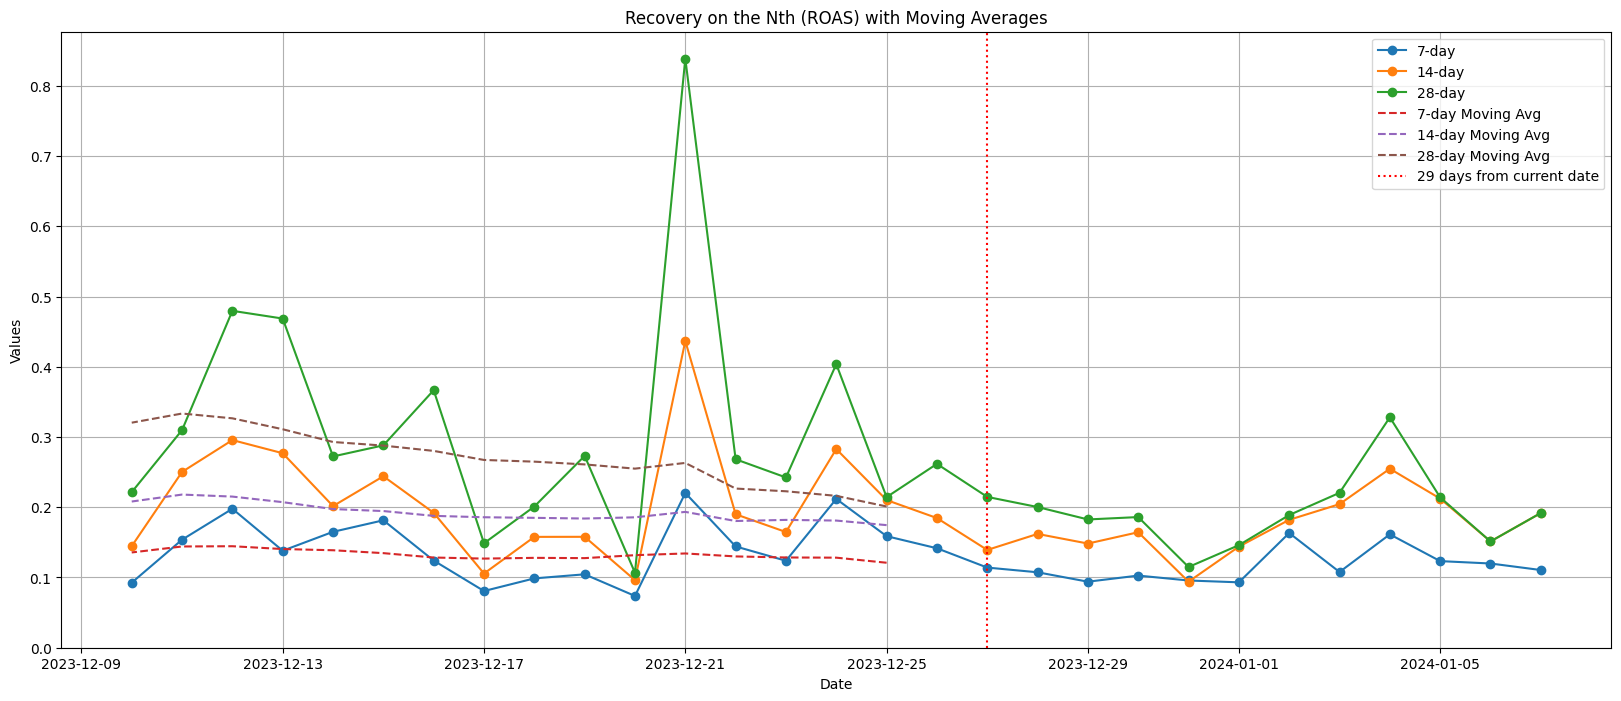

In [7]:
a['date'] = pd.to_datetime(a['date'], format='%Y%m%d')

plt.figure(figsize=(20, 8))

# Plotting both '7-day recovery (rate)', '14-day recycling (rate)', and 'Recovery on the 28th (rate)'
plt.plot(a['date'], a['7-day recovery (rate)'], marker='o', label='7-day')
plt.plot(a['date'], a['14-day recycling (rate)'], marker='o', label='14-day')
plt.plot(a['date'], a['Recovery on the 28th (rate)'], marker='o', label='28-day')

# Calculate and plot 7-day moving average
ma_7day = a['7-day recovery (rate)'].rolling(window=14).mean()
plt.plot(a['date'], ma_7day, label='7-day Moving Avg', linestyle='dashed')

# Calculate and plot 14-day moving average
ma_14day = a['14-day recycling (rate)'].rolling(window=14).mean()
plt.plot(a['date'], ma_14day, label='14-day Moving Avg', linestyle='dashed')

# Calculate and plot 28-day moving average
ma_28day = a['Recovery on the 28th (rate)'].rolling(window=14).mean()
plt.plot(a['date'], ma_28day, label='28-day Moving Avg', linestyle='dashed')

# Set y-axis limit to start from 0
plt.ylim(bottom=0)

# Add a vertical dotted line for the day that is 29 days from the current date
current_date = datetime.now().date()
target_date = current_date - timedelta(days=29)
plt.axvline(target_date, color='red', linestyle='dotted', label='29 days from current date')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Recovery on the Nth (ROAS) with Moving Averages')
plt.grid(True)
plt.legend()
plt.show()


In [8]:
file_path = 'bi_report_20240125_testing_3.csv'

# # Load the CSV file into a DataFrame
etl_output = pd.read_csv(file_path)
etl_output['date'] = pd.to_datetime(etl_output['date'], format = '%Y%m%d')
bi_tool_actuals['date'] = pd.to_datetime(bi_tool_actuals['date'], format = '%Y%m%d')


a = pd.merge(bi_tool_actuals[bi_tool_actuals['date'] > '2023-12-16'][bi_tool_actuals['channel'] == 'Facebook Ads'], etl_output[etl_output['media_source'] == 'Facebook Ads'], on='date')


C:\Users\Win11\AppData\Local\Temp\ipykernel_12032\3831617278.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = pd.merge(bi_tool_actuals[bi_tool_actuals['date'] > '2023-12-16'][bi_tool_actuals['channel'] == 'Facebook Ads'], etl_output[etl_output['media_source'] == 'Facebook Ads'], on='date')


In [9]:
etl_output.sample(30)

,media_source,date,pred_14,pred_28,pred_56,pred_63,pred_70,pred_77,pred_84,pred_91,pred_98,pred_100,pred_105,pred_112,pred_119,pred_126,pred_133,roas_d100_error,pred_payback,pb_window_error
93,unityads_int,2023-12-18,NaN,NaN,1.096203,1.178395,1.260587,1.342779,1.424972,1.507164,1.589356,1.612839,1.671548,1.753740,1.835933,1.918125,2.000317,0.086447,NaN,NaN
42,applovin_int,2023-12-29,NaN,0.225978,0.322786,0.346989,0.371191,0.395393,0.419595,0.443797,0.468000,0.474914,0.492202,0.516404,0.540606,0.564808,0.589011,0.442961,312.0,180.0
95,unityads_int,2023-12-20,NaN,NaN,0.252013,0.270909,0.289805,0.308700,0.327596,0.346492,0.365388,0.370786,0.384283,0.403179,0.422075,0.440970,0.459866,0.086447,363.0,41.0
143,All paid,2024-01-06,0.000000,0.223782,0.319650,0.343617,0.367584,0.391551,0.415518,0.439485,0.463452,0.470299,0.487419,0.511386,0.535353,0.559320,0.583287,0.064659,315.0,23.0
126,All paid,2023-12-20,0.000000,0.000000,0.385945,0.414883,0.443821,0.472759,0.501697,0.530634,0.559572,0.567840,0.588510,0.617448,0.646386,0.675324,0.704261,0.032755,267.0,12.0
50,applovin_int,2024-01-06,NaN,0.166336,0.237595,0.255409,0.273224,0.291039,0.308853,0.326668,0.344482,0.349572,0.362297,0.380112,0.397926,0.415741,0.433556,0.429021,374.0,209.0
122,unityads_int,2024-01-16,0.279893,0.342193,0.488789,0.525438,0.562087,0.598736,0.635385,0.672034,0.708683,0.719154,0.745332,0.781981,0.818629,0.855278,0.891927,0.184959,193.0,46.0
133,All paid,2023-12-27,0.000000,0.000000,0.517491,0.556292,0.595093,0.633894,0.672695,0.711496,0.750297,0.761383,0.789098,0.827899,0.866700,0.905501,0.944301,0.036469,180.0,8.0
97,unityads_int,2023-12-22,NaN,NaN,0.466694,0.501686,0.536678,0.571670,0.606663,0.641655,0.676647,0.686645,0.711639,0.746632,0.781624,0.816616,0.851608,0.087320,209.0,24.0
148,All paid,2024-01-11,0.216320,0.290773,0.415340,0.446482,0.477624,0.508765,0.539907,0.571049,0.602191,0.611088,0.633332,0.664474,0.695616,0.726758,0.757900,0.051404,251.0,16.0


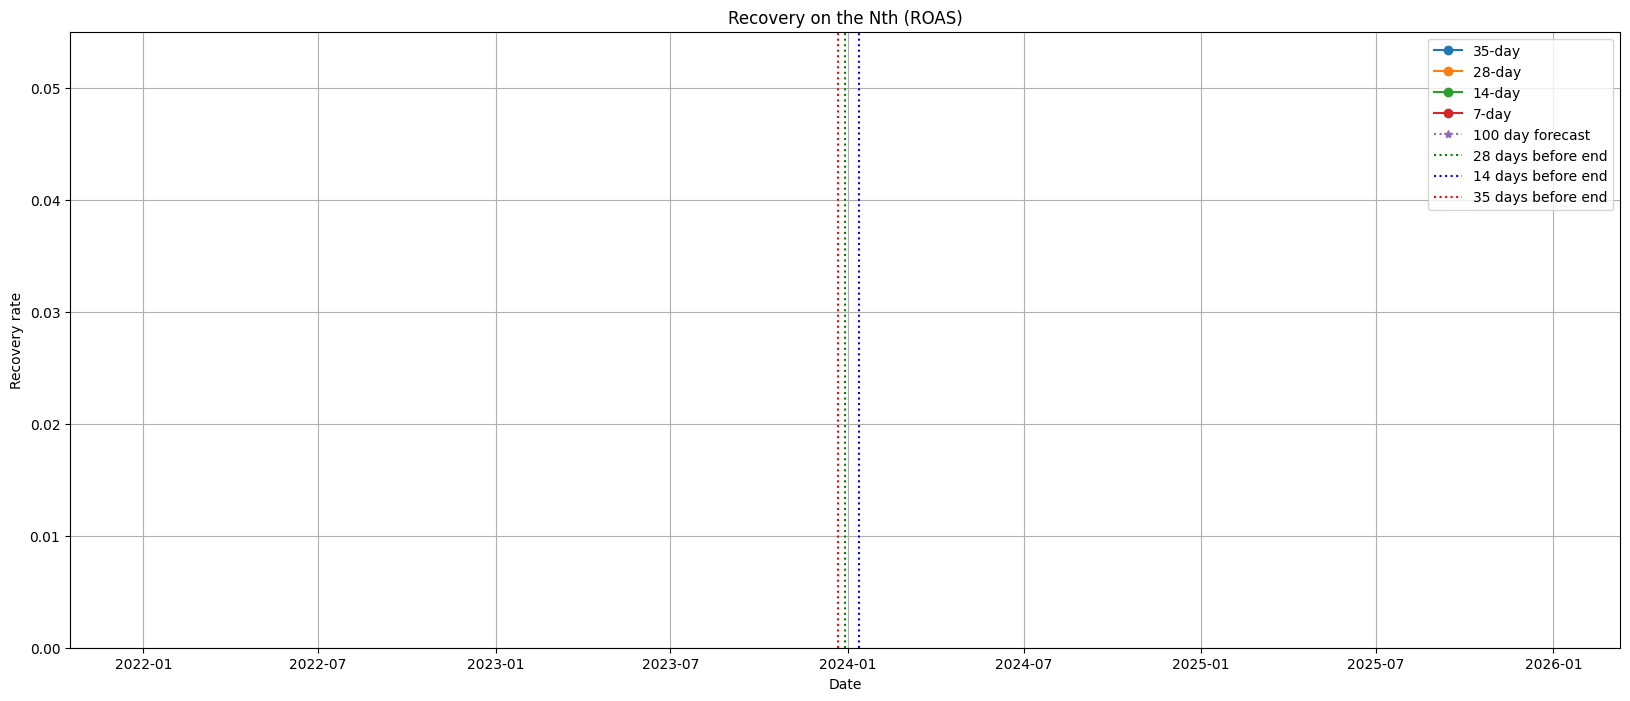

In [10]:
plt.figure(figsize=(20, 8))  # Adjust width and height as needed

# Plotting both 'pred_56' and 'pred_100'
plt.plot(a['date'], a['35-day recovery (rate)'], marker='o', label='35-day')
plt.plot(a['date'], a['Recovery on the 28th (rate)'], marker='o', label='28-day')
plt.plot(a['date'], a['14-day recycling (rate)'], marker='o', label='14-day')
plt.plot(a['date'], a['7-day recovery (rate)'], marker='o', label='7-day')

plt.plot(a['date'], a['pred_100'], marker='*', label='100 day forecast', linestyle='dotted')

# Set y-axis limit to start from 0
plt.ylim(bottom=0)

# Add a vertical dotted line for the day that is 29 days from the current date
current_date = datetime.now().date()# Get the current date
target_date = current_date - timedelta(days=27)
plt.axvline(target_date, color='green', linestyle='dotted', label='28 days before end')

# Add a vertical dotted line for the day that is 29 days from the current date
current_date = datetime.now().date()  # Get the current date
target_date = current_date - timedelta(days=13)
plt.axvline(target_date, color='blue', linestyle='dotted', label='14 days before end')

# Add a vertical dotted line for the day that is 29 days from the current date
current_date = datetime.now().date()  # Get the current date
target_date = current_date - timedelta(days=34)
plt.axvline(target_date, color='red', linestyle='dotted', label='35 days before end')


plt.xlabel('Date')
plt.ylabel('Recovery rate')
plt.title('Recovery on the Nth (ROAS)')
plt.grid(True)
plt.legend()  # Add legend to differentiate between pred_56 and pred_100
plt.show()

# I want to join etl_output and bi_tolito, then I want to. Create a column that groups dates by 1,2,3. Now crea

# Create a column that groups dates into 1, 2, or 3
# df['group'] = np.select([df['date'] < 'date_A', df['date'] < 'date_B'], [1, 2], default=3)

# Create columns 'official_day_14' and 'official_day_28'
# df['official_day_14'] = np.where(df['group'] > 1, df['pred_14'], df['roas_14'])
# df['official_day_28'] = np.where(df['group'] > 2, df['pred_28'], df['roas_28'])


## Average increases

Something that you can do is see if the ratios on the predictions are similar to the ratios observed in the past for big samples. This can give you an understanding of the bias in the estimations 

- So I have to load the data, and find the moments where the data does not match in different periods of time. 

- Then replace those dates by the predictions, and have those days marked as predictions. 

- Then plot predictions with start and doted line.

In [151]:
a[['date', '7-day recovery (rate)', '14-day recycling (rate)', 'Recovery on the 28th (rate)', '35-day recovery (rate)']].sort_values(by = 'date')

,date,7-day recovery (rate),14-day recycling (rate),Recovery on the 28th (rate),35-day recovery (rate)
30,2023-12-18,0.1059,0.1600,0.2370,0.2582
29,2023-12-19,0.1131,0.1856,0.2685,0.3068
28,2023-12-20,0.1143,0.1459,0.2354,0.2762
27,2023-12-21,0.1342,0.1543,0.2039,0.2455
26,2023-12-22,0.1274,0.2037,0.3258,0.3716
25,2023-12-23,0.1238,0.1673,0.2064,0.2993
24,2023-12-24,0.1530,0.1995,0.2424,0.2463
23,2023-12-25,0.1618,0.1746,0.2294,0.2271
22,2023-12-26,0.1755,0.3026,0.4190,0.4743
21,2023-12-27,0.1471,0.2663,0.2371,0.2380


In [152]:
# first_duplicate_index = a.duplicated(subset=['14-day recycling (rate)', 'Recovery on the 28th (rate)'])
a['14_not_useful'] = (a['14-day recycling (rate)'] == a['Recovery on the 28th (rate)']).astype(int)
a['28_not_useful'] = (a['Recovery on the 28th (rate)'] == a['35-day recovery (rate)']).astype(int)


In [153]:
# Conditionally replace values based on 14_not_useful and 28_not_useful
# a.loc[a['14_not_useful'] == 1, '14-day recycling (rate)'] = np.where(a['14_not_useful'] == 1, a['pred_14'], a['14-day recycling (rate)'])
# a.loc[a['28_not_useful'] == 1, '28-day recycling (rate)'] = np.where(a['28_not_useful'] == 1, a['pred_28'], a['28-day recycling (rate)'])

# Conditionally replace values based on 14_not_useful and 28_not_useful
a['effective_d14_roas'] = np.where(a['14_not_useful'] == 1, a['pred_14'], a['14-day recycling (rate)'])
a['effective_d28_roas'] = np.where(a['28_not_useful'] == 1, a['pred_28'], a['Recovery on the 28th (rate)'])


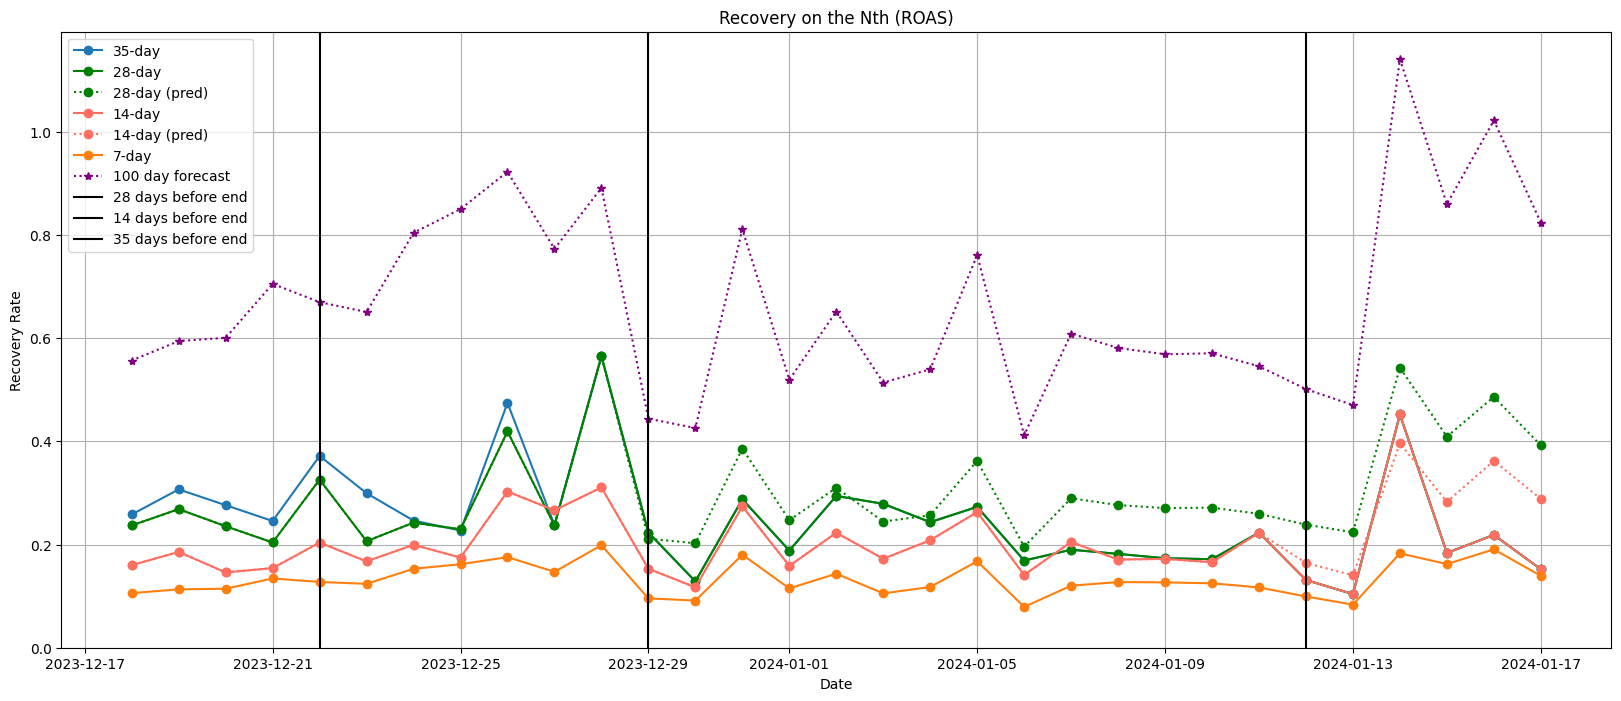

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# # Set the style of the plot
# plt.style.use('seaborn-whitegrid')

# Create a figure with specified width and height
plt.figure(figsize=(20, 8))

# Plotting the data
plt.plot(a['date'], a['35-day recovery (rate)'], marker='o', label='35-day')
plt.plot(a['date'], a['Recovery on the 28th (rate)'], marker='o', label='28-day', color = 'green')
plt.plot(a['date'], a['effective_d28_roas'], marker='o', label='28-day (pred)', linestyle='dotted', color = 'green')
plt.plot(a['date'], a['14-day recycling (rate)'], marker='o', label='14-day', color = '#FF6F61')
plt.plot(a['date'], a['effective_d14_roas'], marker='o', label='14-day (pred)', linestyle='dotted', color='#FF6F61')  # Coralle Orange
plt.plot(a['date'], a['7-day recovery (rate)'], marker='o', label='7-day')

# Plotting the 100-day forecast with a solid line
plt.plot(a['date'], a['pred_100'], marker='*', label='100 day forecast', color = '#800080', linestyle='dotted')

# Set y-axis limit to start from 0
plt.ylim(bottom=0)

# Add vertical lines with solid black color
current_date = datetime.now().date()
target_date = current_date - timedelta(days=27)
plt.axvline(target_date, color='black', linestyle='-', label='28 days before end')

current_date = datetime.now().date()
target_date = current_date - timedelta(days=13)
plt.axvline(target_date, color='black', linestyle='-', label='14 days before end')

current_date = datetime.now().date()
target_date = current_date - timedelta(days=34)
plt.axvline(target_date, color='black', linestyle='-', label='35 days before end')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Recovery Rate')
plt.title('Recovery on the Nth (ROAS)')
plt.legend()

plt.grid(True)
plt.show()



C:\Users\Win11\AppData\Local\Temp\ipykernel_13596\2920975750.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = pd.merge(bi_tool_actuals[bi_tool_actuals['date'] > '2023-12-16'][bi_tool_actuals['channel'] == ch], etl_output[etl_output['media_source'] == 'Facebook Ads'], on='date')


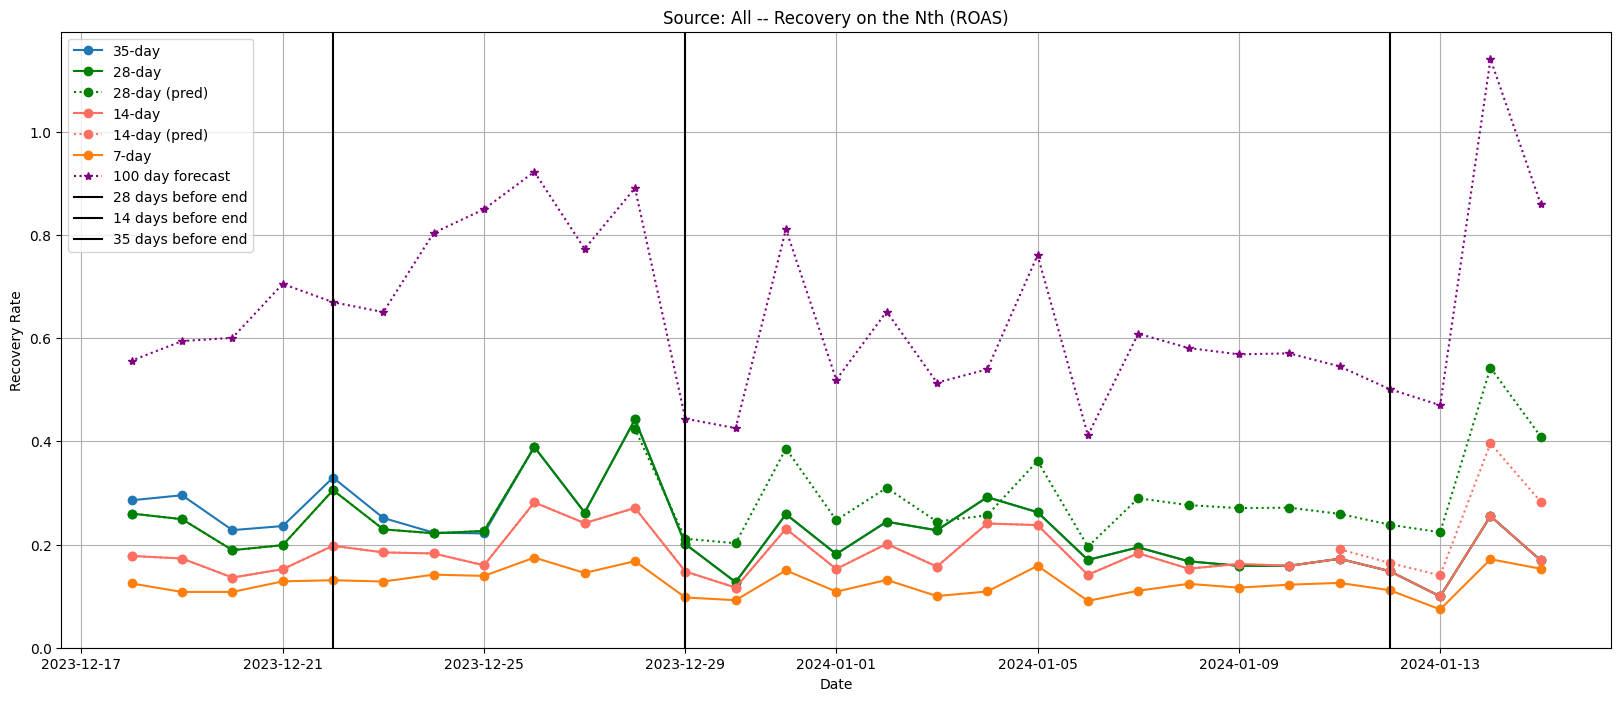

C:\Users\Win11\AppData\Local\Temp\ipykernel_13596\2920975750.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = pd.merge(bi_tool_actuals[bi_tool_actuals['date'] > '2023-12-16'][bi_tool_actuals['channel'] == ch], etl_output[etl_output['media_source'] == 'Facebook Ads'], on='date')


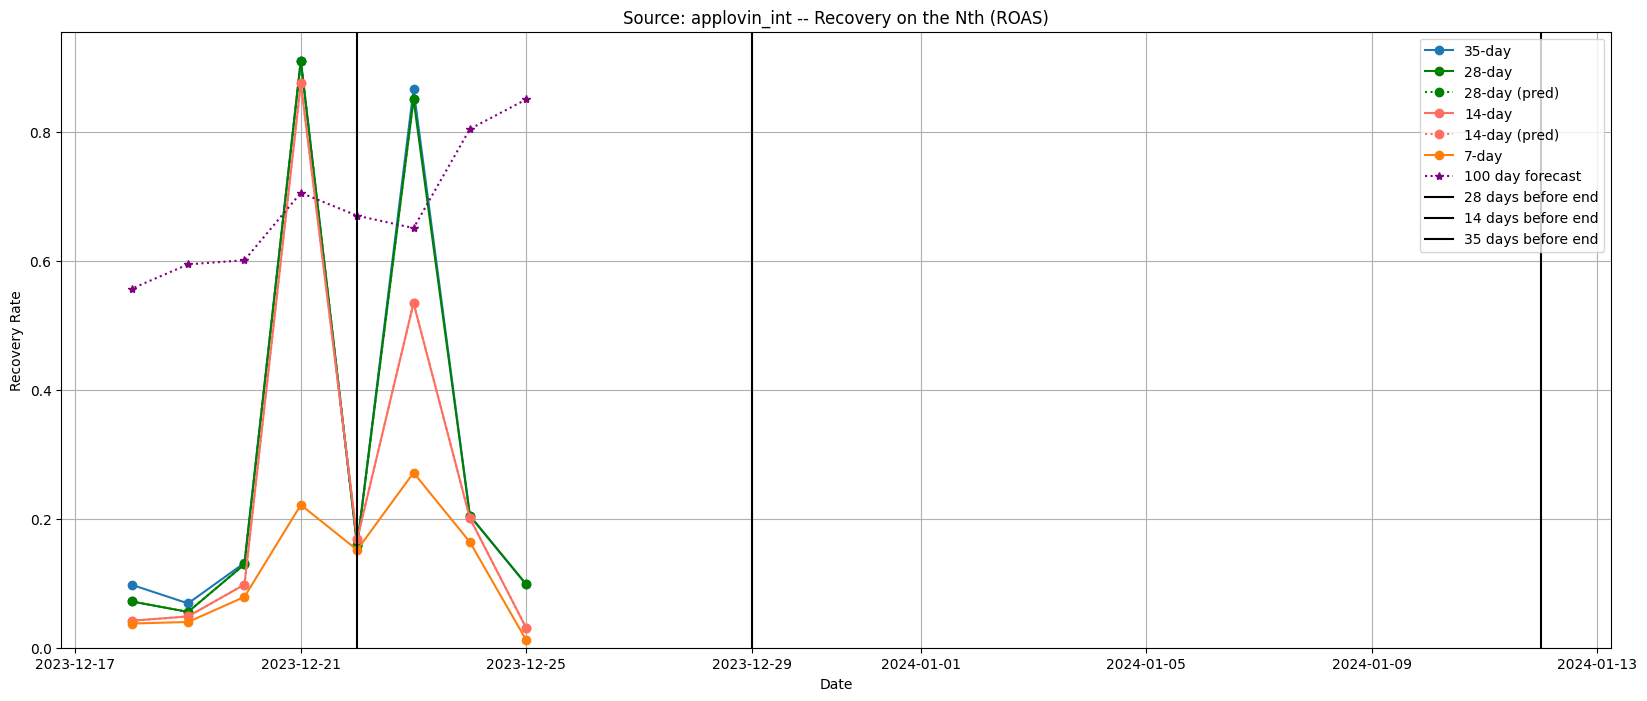

C:\Users\Win11\AppData\Local\Temp\ipykernel_13596\2920975750.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = pd.merge(bi_tool_actuals[bi_tool_actuals['date'] > '2023-12-16'][bi_tool_actuals['channel'] == ch], etl_output[etl_output['media_source'] == 'Facebook Ads'], on='date')


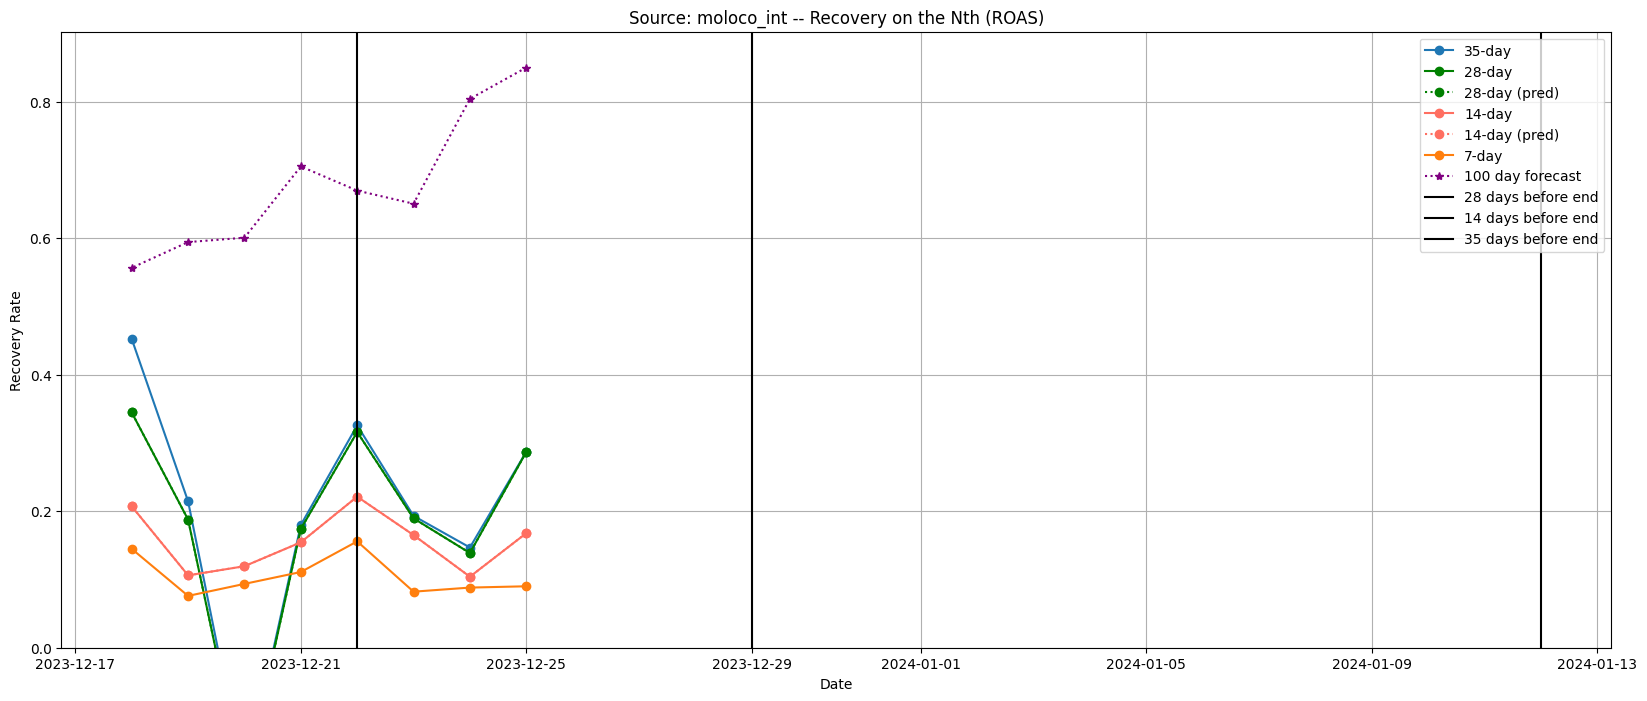

C:\Users\Win11\AppData\Local\Temp\ipykernel_13596\2920975750.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = pd.merge(bi_tool_actuals[bi_tool_actuals['date'] > '2023-12-16'][bi_tool_actuals['channel'] == ch], etl_output[etl_output['media_source'] == 'Facebook Ads'], on='date')


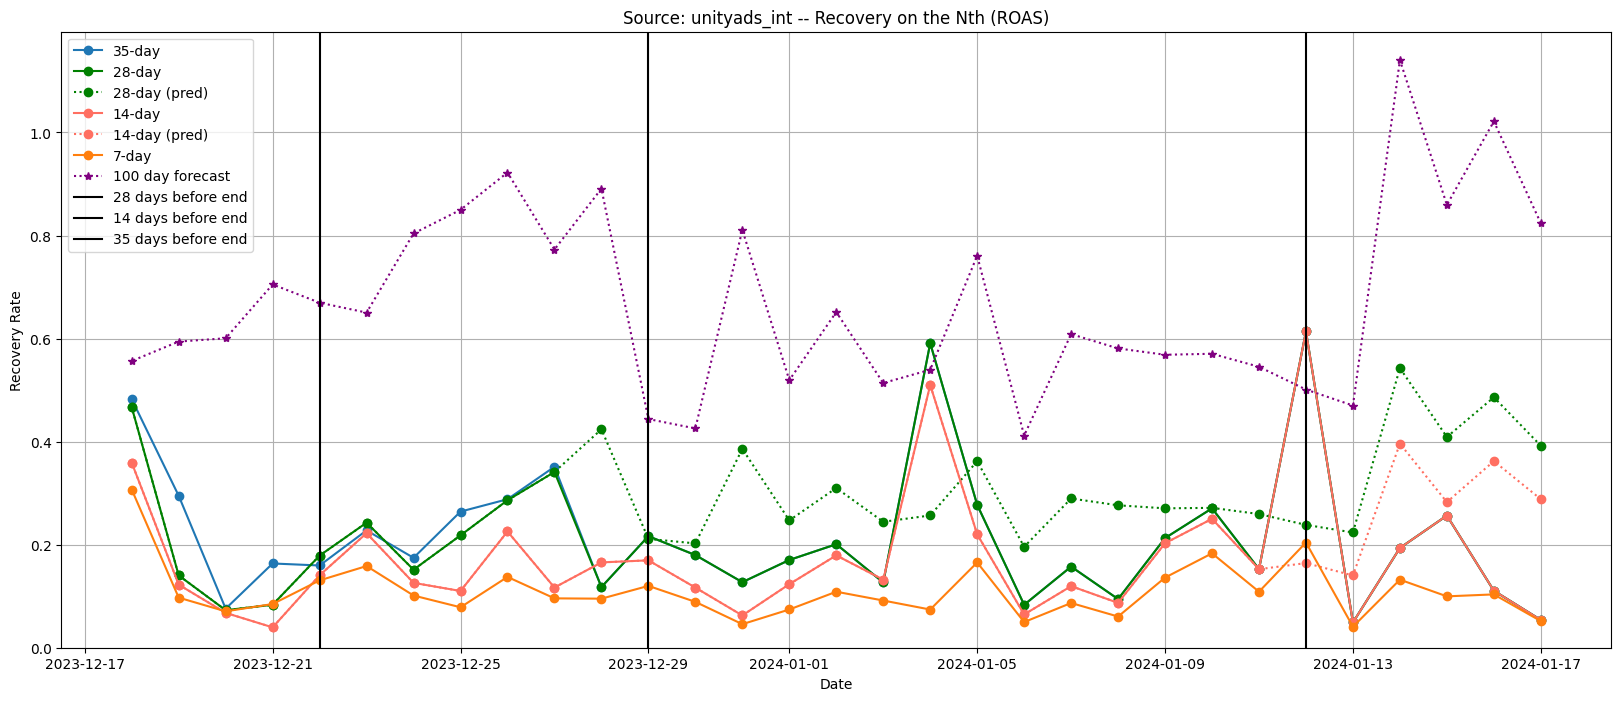

C:\Users\Win11\AppData\Local\Temp\ipykernel_13596\2920975750.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  a = pd.merge(bi_tool_actuals[bi_tool_actuals['date'] > '2023-12-16'][bi_tool_actuals['channel'] == ch], etl_output[etl_output['media_source'] == 'Facebook Ads'], on='date')


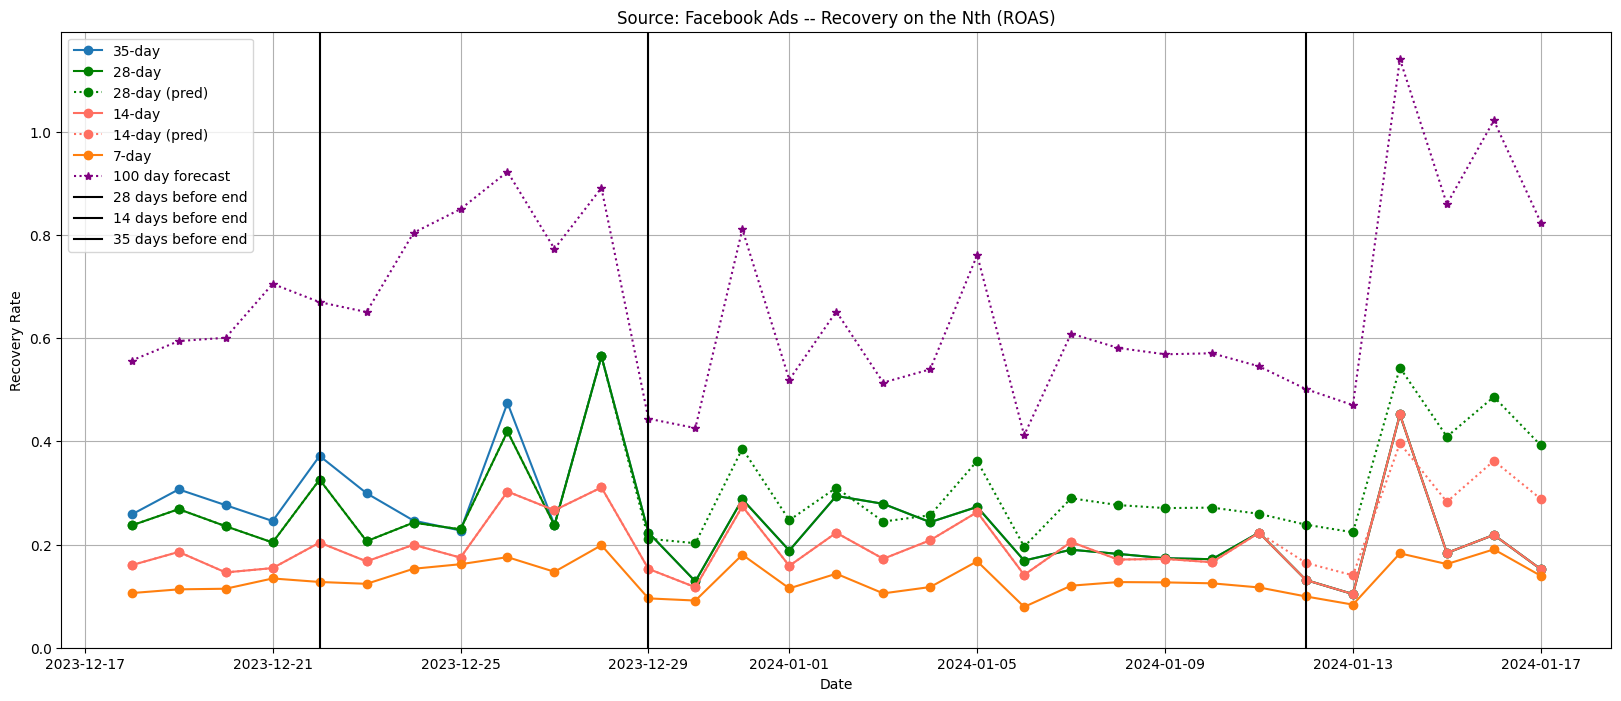

In [158]:
for ch in bi_tool_actuals['channel'].unique(): 
    a = pd.merge(bi_tool_actuals[bi_tool_actuals['date'] > '2023-12-16'][bi_tool_actuals['channel'] == ch], etl_output[etl_output['media_source'] == 'Facebook Ads'], on='date')
    a['14_not_useful'] = (a['14-day recycling (rate)'] == a['Recovery on the 28th (rate)']).astype(int)
    a['28_not_useful'] = (a['Recovery on the 28th (rate)'] == a['35-day recovery (rate)']).astype(int)

    a['effective_d14_roas'] = np.where(a['14_not_useful'] == 1, a['pred_14'], a['14-day recycling (rate)'])
    a['effective_d28_roas'] = np.where(a['28_not_useful'] == 1, a['pred_28'], a['Recovery on the 28th (rate)'])

    
    # Create a figure with specified width and height
    plt.figure(figsize=(20, 8))
    
    # Plotting the data
    plt.plot(a['date'], a['35-day recovery (rate)'], marker='o', label='35-day')
    plt.plot(a['date'], a['Recovery on the 28th (rate)'], marker='o', label='28-day', color = 'green')
    plt.plot(a['date'], a['effective_d28_roas'], marker='o', label='28-day (pred)', linestyle='dotted', color = 'green')
    plt.plot(a['date'], a['14-day recycling (rate)'], marker='o', label='14-day', color = '#FF6F61')
    plt.plot(a['date'], a['effective_d14_roas'], marker='o', label='14-day (pred)', linestyle='dotted', color='#FF6F61')  # Coralle Orange
    plt.plot(a['date'], a['7-day recovery (rate)'], marker='o', label='7-day')
    
    # Plotting the 100-day forecast with a solid line
    plt.plot(a['date'], a['pred_100'], marker='*', label='100 day forecast', color = '#800080', linestyle='dotted')
    
    # Set y-axis limit to start from 0
    plt.ylim(bottom=0)
    
    # Add vertical lines with solid black color
    current_date = datetime.now().date()
    target_date = current_date - timedelta(days=27)
    plt.axvline(target_date, color='black', linestyle='-', label='28 days before end')
    
    current_date = datetime.now().date()
    target_date = current_date - timedelta(days=13)
    plt.axvline(target_date, color='black', linestyle='-', label='14 days before end')
    
    current_date = datetime.now().date()
    target_date = current_date - timedelta(days=34)
    plt.axvline(target_date, color='black', linestyle='-', label='35 days before end')
    
    # Add labels and legend
    plt.xlabel('Date')
    plt.ylabel('Recovery Rate')
    plt.title('Source: ' + ch + ' -- Recovery on the Nth (ROAS)')
    plt.legend()
    
    plt.grid(True)
    plt.show()



In [68]:
# Find the moments where the data does not match in different periods of time

# Where 14_not_useful replace a['14-day recycling (rate)'] by a['pred_14']
# Where 28_not_useful replace a['28-day recycling (rate)'] by a['pred_28']


## Interesting to see that actually day 14 and day 7 should not match 
## This means that it should be where the previous predictions match when you should stop using a specific one. For example when 28 and 14 are the same, you cannot use day 14 anymore. 

a[a.columns[:20]]

,date,channel,ECPI (installation),CPI(registration),Install,AF new,Register new,spend,PaidCPI,Payer (rate),24h payer (rate),24 hours LTV,24 hours recycling (rate),3-day recovery (rate),7-day recovery (rate),14-day recycling (rate),21st recycling (rate),Recovery on the 28th (rate),35-day recovery (rate),42 days recycling (rate)
0,2024-01-15,All,7.95,8.44,2911,2908,2738,23118.97,106.54,217 (7.93%),120 (4.38%),0.57,"1,563.25 (6.76%)","2,549.75 (11.03%)",0.1530,0.1691,"3,908.51 (16.91%)",0.1691,0.1691,"3,908.51 (16.91%)"
1,2024-01-14,All,8.21,8.81,2831,2830,2638,23242.15,115.63,201 (7.62%),112 (4.25%),0.72,"1,887.48 (8.12%)","2,797.55 (12.04%)",0.1715,0.2551,"5,929.04 (25.51%)",0.2551,0.2551,"5,929.04 (25.51%)"
2,2024-01-13,All,8.81,9.39,2623,2622,2462,23109.01,111.64,207 (8.41%),118 (4.79%),0.48,"1,180.56 (5.11%)","1,318.65 (5.71%)",0.0743,0.0995,"2,299.36 (9.95%)",0.0995,0.0995,"2,299.36 (9.95%)"
3,2024-01-12,All,9.15,9.87,2542,2542,2357,23270.31,118.73,196 (8.32%),117 (4.96%),0.43,"1,005.30 (4.32%)","1,902.86 (8.18%)",0.1114,0.1483,"3,451.14 (14.83%)",0.1483,0.1483,"3,451.14 (14.83%)"
4,2024-01-11,All,8.54,9.34,2845,2844,2599,24284.69,116.75,208 (8%),107 (4.12%),0.46,"1,182.62 (4.87%)","1,954.50 (8.05%)",0.1256,0.1724,"4,186.59 (17.24%)",0.1724,0.1724,"4,186.59 (17.24%)"
5,2024-01-10,All,8.51,9.23,2833,2831,2612,24100.69,116.43,207 (7.92%),104 (3.98%),0.48,"1,254.86 (5.21%)","1,924.34 (7.98%)",0.1222,0.1588,"3,827.92 (15.88%)",0.1588,0.1588,"3,827.92 (15.88%)"
6,2024-01-09,All,8.83,9.57,2706,2706,2495,23880.74,106.61,224 (8.98%),114 (4.57%),0.50,"1,248.74 (5.23%)","2,017.65 (8.45%)",0.1164,0.1624,"3,792.51 (15.88%)",0.1588,0.1588,"3,792.51 (15.88%)"
7,2024-01-08,All,9.63,10.43,2693,2627,2424,25286.20,124.56,203 (8.37%),106 (4.37%),0.54,"1,307.53 (5.17%)","1,969.42 (7.79%)",0.1238,0.1532,"4,235.59 (16.75%)",0.1675,0.1675,"4,235.59 (16.75%)"
8,2024-01-07,All,10.02,10.84,2739,2515,2324,25188.82,109.99,229 (9.85%),124 (5.34%),0.60,"1,389.55 (5.52%)","2,002.89 (7.95%)",0.1105,0.1831,"4,899.91 (19.45%)",0.1945,0.1945,"4,899.91 (19.45%)"
9,2024-01-06,All,9.61,10.33,2741,2741,2551,26345.50,119.75,220 (8.62%),112 (4.39%),0.56,"1,429.64 (5.43%)","2,110.17 (8.01%)",0.0908,0.1414,"4,483.54 (17.02%)",0.1702,0.1702,"4,483.54 (17.02%)"


In [67]:
a.columns

Index(['date', 'channel', 'ECPI (installation)', 'CPI(registration)',
       'Install', 'AF new', 'Register new', 'spend', 'PaidCPI', 'Payer (rate)',
       '24h payer (rate)', '24 hours LTV', '24 hours recycling (rate)',
       '3-day recovery (rate)', '7-day recovery (rate)',
       '14-day recycling (rate)', '21st recycling (rate)',
       'Recovery on the 28th (rate)', '35-day recovery (rate)',
       '42 days recycling (rate)', '56 days recycling (rate)',
       '90-day recovery (rate)', '120-day recovery (rate)',
       '150-day recovery (rate)', '180 days recovery (rate)',
       '210 days recycling (rate)', '240 days recycling (rate)',
       '270 days recovery (rate)', '300 days recovery (rate)',
       '330 days recycling (rate)', '360-day recovery (rate)',
       '390 days recovery (rate)', '420 days recycling (rate)',
       '450 days recovery (rate)', '480 days recovery (rate)',
       '510 day recycling (rate)', '540 day recovery (rate)',
       '570 days recovery (rate)'

In [66]:
a.head()

,date,channel,ECPI (installation),CPI(registration),Install,AF new,Register new,spend,PaidCPI,Payer (rate),...,pred_98,pred_100,pred_105,pred_112,pred_119,pred_126,pred_133,roas_d100_error,pred_payback,pb_window_error
0,2024-01-15,All,7.95,8.44,2911,2908,2738,23118.97,106.54,217 (7.93%),...,0.328951,0.332424,0.327745,0.338776,0.347141,0.352017,0.343920,0.073562,400.0,36.0
1,2024-01-14,All,8.21,8.81,2831,2830,2638,23242.15,115.63,201 (7.62%),...,0.803674,0.808795,0.823436,0.808524,0.871126,0.949218,0.944171,0.062035,169.0,23.0
2,2024-01-13,All,8.81,9.39,2623,2622,2462,23109.01,111.64,207 (8.41%),...,0.188450,0.179643,0.190538,0.197105,0.194632,0.206111,0.190964,0.053034,460.0,32.0
3,2024-01-12,All,9.15,9.87,2542,2542,2357,23270.31,118.73,196 (8.32%),...,0.476954,0.487632,0.472294,0.521190,0.531150,0.548200,0.394305,0.064212,357.0,27.0
4,2024-01-11,All,8.54,9.34,2845,2844,2599,24284.69,116.75,208 (8%),...,0.604192,0.633887,0.629220,0.649329,0.679950,0.705596,0.687168,0.039661,254.0,16.0


# Actuals

So you can consider the hypothesis of this actually really happening

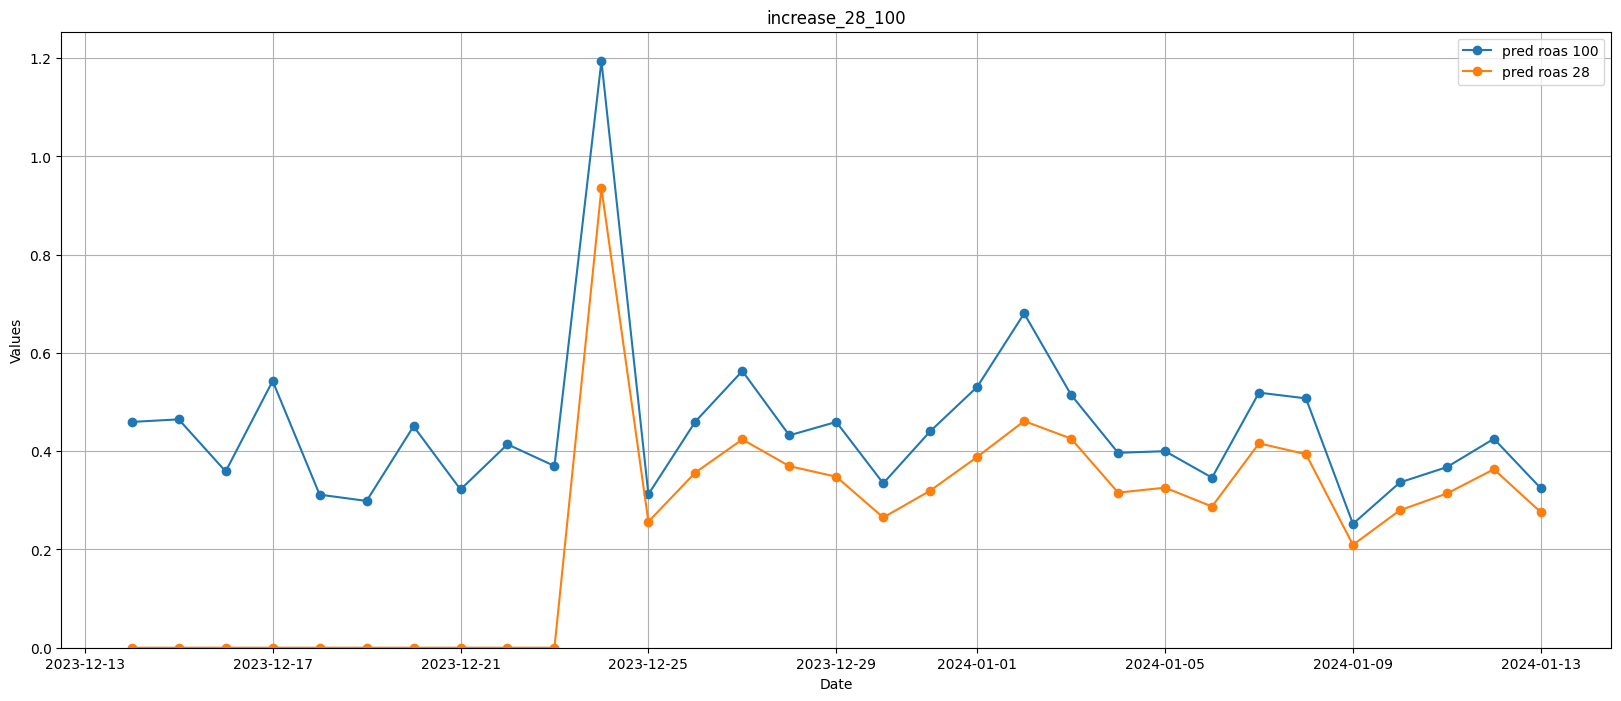

In [18]:
# Load the predictions 
file_path = 'bi_report_20240121.csv'

# Load the CSV file into a DataFrame
etl_output = pd.read_csv(file_path)
etl_output['date'] = pd.to_datetime(etl_output['date'], format = '%Y%m%d')

plt.figure(figsize=(20, 8))

plt.plot(etl_output['date'], etl_output['pred_100'], marker='o', label='pred roas 100')
plt.plot(etl_output['date'], etl_output['pred_28'], marker='o', label='pred roas 28')

# Set y-axis limit to start from 0
plt.ylim(bottom=0)

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('increase_28_100')
plt.grid(True)
plt.legend()  # Add legend to differentiate between pred_56 and pred_100
plt.show()


In [ ]:
# 

# Users 

In [59]:
import os
# os.chdir("/root/pltv/runtime")
os.chdir("C:/Users/Win11/Documents/Repos/PLTV-Bubble-Arena/UA_BI_report/")
model_dir = 'C:/Users/Win11/Documents/'
import pickle
import pandas as pd
import requests
from urllib.parse import urlencode
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.linear_model import HuberRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from tqdm import tqdm, tqdm_notebook
import numpy as np
import random
import json
from datetime import datetime, timedelta
import re
from sklearn.compose import ColumnTransformer
import itertools

bs_token = 'S7Fek4qridIxY1sUfYUyOl0rLak1Eedeg0TTCWHzUHqIFuUGN07xZtd41ZCp2UvE'  # Token Bingo Arena， but it doesn't matter
host = 'td.winnerstudio.vip'

# Path Thinking Engine tables
tables_path = 'script_tables_bubble_arena_ios_bi_tool.py'

today = pd.to_datetime((datetime.now() - timedelta(days = 1)).strftime('%Y-%m-%d'))
start_date = (datetime.now() - timedelta(days = 38)).strftime('%Y-%m-%d')
end_date = (datetime.now() - timedelta(days = 8)).strftime('%Y-%m-%d')
client_name = 'ios'

with open('bubble_party_ios_ptlv_dictionary_2024_jan.pkl', 'rb') as file:
    model_dict = pickle.load(file)

with open('bb_arena_ios_ptlv_rules_2024.pkl', 'rb') as file:
    rules_dict = pickle.load(file)

#endregion

#region I.   USER-LEVEL DF: LOAD & PREPARATION  -----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

def load_data(tables, bs_token, host):
    def pull_data(sql_script, bs_token, host):

        data = {
            'token':          bs_token,
            'format':         'json_object',
            'timeoutSeconds': 2000,
            'sql':            sql_script
        }

        data = str(urlencode(data))
        response = requests.post(f'http://{host}:8992/querySql?{data}', timeout = 1000000)

        # Sample list of JSON strings
        json_list = response.text.split('\n')[1:]

        # Convert JSON strings to dictionaries
        dict_list = []
        for json_str in json_list:
            try:
                dict_list.append(json.loads(json_str))
            except json.JSONDecodeError as e:
                print(f"Error parsing JSON: {e}")

        # Create a pandas DataFrame
        data = pd.DataFrame(dict_list).sort_index(axis = 1)
        print(data)
        # Display the DataFrame
        return data

    # Load the first data using USER_PAYMENT, and then iteatevely join the remaining data for trainning

    df = pull_data(tables[0], bs_token, host)
    # for i in range(1, len(tables)):
    #     new_data = pull_data(tables[i], bs_token, host)
    #     df = df.merge(new_data, on = '#account_id', how = 'left')

    return df

# I.I. Load queries from remote python script
exec(open(tables_path).read())
tables = locals().get('tables')
df = load_data(tables, bs_token, host)

Error parsing JSON: Expecting value: line 1 column 1 (char 0)
       #account_id  cp1  cp3  cp7     p1    p10   p100   p105    p11   p112  \
0         89198937    0    0    0   0.00   0.00   0.00   0.00   0.00   0.00   
1         89199175    0    0    0   0.00   0.00   0.00   0.00   0.00   0.00   
2         89199181    1    1    1   4.38   4.38   4.38   4.38   4.38   4.38   
3         89199713    0    0    0   0.00   0.00   0.00   0.00   0.00   0.00   
4         89200022    0    0    0   0.00   0.00   0.00   0.00   0.00   0.00   
...            ...  ...  ...  ...    ...    ...    ...    ...    ...    ...   
103549    89244391    0    0    0   0.00   0.00   0.00   0.00   0.00   0.00   
103550    89244577    6    6    6  54.75  54.75  54.75  54.75  54.75  54.75   
103551    89245640    0    0    0   0.00   0.00   0.00   0.00   0.00   0.00   
103552    89246077    0    0    0   0.00   0.00   0.00   0.00   0.00   0.00   
103553    89246642    0    0    0   0.00   0.00   0.00   0.00   0.00 

In [62]:

problematic_user = '89238905'
df[df['#account_id'] == problematic_user]


,#account_id,cp1,cp3,cp7,p1,p10,p100,p105,p11,p112,...,p70,p77,p8,p84,p9,p91,p98,ph1,ph6,register_time
26086,89238905,28,41,84,930.69,10938.18,13832.03,13832.03,10938.18,13832.03,...,13832.03,13832.03,10421.77,13832.03,10938.18,13832.03,13832.03,36.57,36.57,2023-12-24


In [ ]:
df

In [ ]:
selected_1 = df[['date'] + [col for col in df.columns if col.startswith('pred') and col.endswith('100')]]
selected = df[['date'] + [col for col in df.columns if col.startswith('pred') and col.endswith('56')]]
selected_1.mean() #- selected.mean()

selected.groupby('date').mean() #- selected.mean()
selected.groupby('date').max() #- selected.mean()
df[df['pred_7_56'] >= 10954]